Loan SARAZIN & Anna MARIZY

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm #loi normale
from scipy.stats import uniform #loi uniforme
from scipy import signal
import time

# Filtre de Kalman

Hypothèse :

- Modèle discret et linéaire 
    Hypothèse Linéaire Gaussienne 
    $x(k+1) = F(k)x(k) + G(k)u(k) + v(k)$  
    
    Le bruit d'état $v(k)$ est gaussien de moyenne nulle.

In [2]:
def Kalman_filter(Q, R, z, x0) :
    """Apply the Kalman filter to the measures z to estimate a constant
    
    Args:
        Q (int): the variance of the state noise
        
        R (int): the variance of the measure noise
        
        z (array): array of measures
        
    Returns:
        array: estimated and predicted state variables
    """
    
    # initialisation
    xh = np.zeros(shape = len(z))
    P = np.zeros(shape = len(z))
    P0 = 1
    xh[0] = x0
    P[0] = P0 + Q
    
    for p in range(0, len(z)):
        # estimation
        K = P[p] / (P[p] + R)
        xh[p] = xh[p] + K * (z[p] - xh[p])
        P[p] = P[p] - K * P[p]
        if p < len(z) - 1:
            # prediction
            xh[p + 1] = xh[p]
            P[p + 1] = P[p] + Q
            
    return xh, P

## Estimation d'une constante

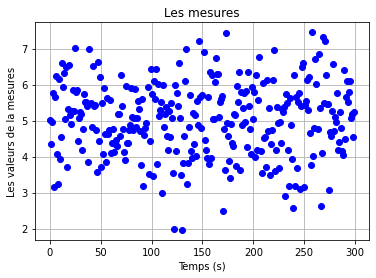

In [3]:
C = 5
R = 1

z = norm.rvs(loc = C, scale = np.sqrt(R), size = 300)

t = np.arange(0, len(z), 1)
plt.plot(t, z, 'bo')
plt.title('Les mesures')
plt.xlabel('Temps (s)')
plt.ylabel('Les valeurs de la mesures')
plt.grid()
plt.show()

In [4]:
Q = 1e-5
x0_est, v0_est = C, 2
x0 = norm.rvs(loc = x0_est, scale = np.sqrt(v0_est))
xh, P = Kalman_filter(Q, R, z, x0)

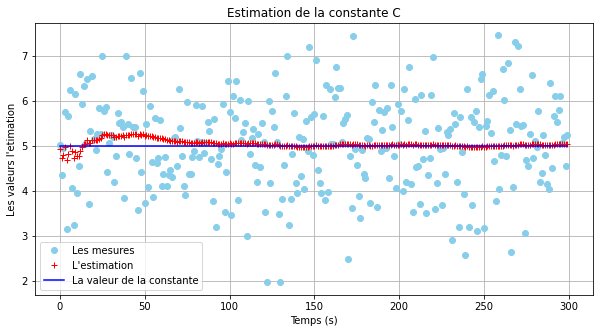

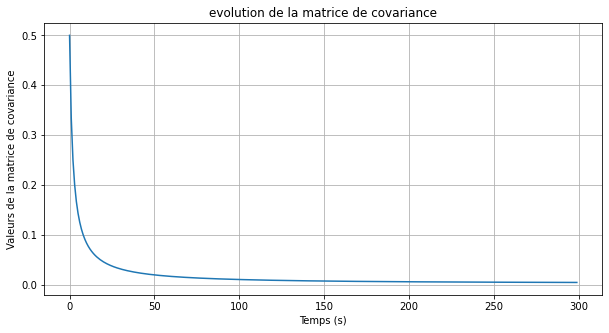

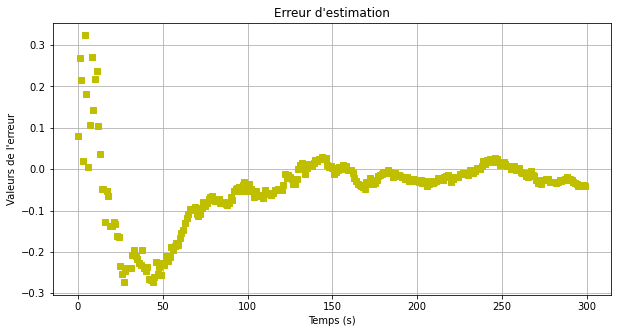

In [5]:
un = C*np.ones(shape=len(z))

plt.figure(figsize=(10, 5))
plt.plot(t, z, 'o', color='skyblue', linestyle='', label = 'Les mesures')
plt.plot(t, xh, 'r+', label = 'L\'estimation')
plt.plot(t, un, 'b', label = 'La valeur de la constante')
plt.title('Estimation de la constante C')
plt.xlabel('Temps (s)')
plt.ylabel('Les valeurs l\'etimation')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t, P)
plt.title('evolution de la matrice de covariance')
plt.xlabel('Temps (s)')
plt.ylabel('Valeurs de la matrice de covariance')
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t, un - xh, 'ys')
plt.title('Erreur d\'estimation')
plt.xlabel('Temps (s)')
plt.ylabel('Valeurs de l\'erreur')
plt.grid()
plt.show()

Le filtre de Kalman permet d'estimer une constante à partir de mesures bruitées (avec un bruit gaussien). Cette méthode est applicable puisque les hypothèses de linéarités et de gaussianité sont vérifiées. Cependant cette convergence dépend fortement de la variance du bruit sur l'état et sur les mesures, ainsi que de l'état initial.

##  Estimation de trois constantes

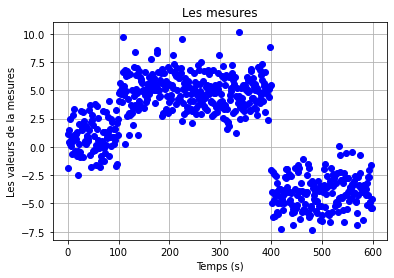

In [6]:
C1, C2, C3 = 1, 5, -4
R = 2

z1 = norm.rvs(loc = C1, scale = np.sqrt(R), size = 100)
z2 = norm.rvs(loc = C2, scale = np.sqrt(R), size = 300)
z3 = norm.rvs(loc = C3, scale = np.sqrt(R), size = 200)
z = np.concatenate((z1, z2, z3))

t = np.arange(0, len(z), 1)
plt.plot(t, z, 'bo')
plt.title('Les mesures')
plt.xlabel('Temps (s)')
plt.ylabel('Les valeurs de la mesures')
plt.grid()
plt.show()

In [7]:
Q = 1e-2
x0_est, v0_est = C1, 2
x0 = norm.rvs(loc = x0_est, scale = np.sqrt(v0_est))
xh, P = Kalman_filter(Q, R, z, x0)

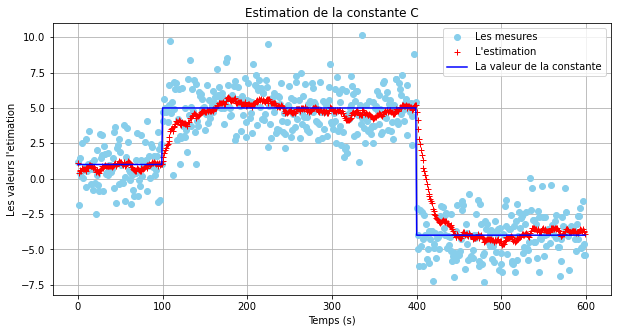

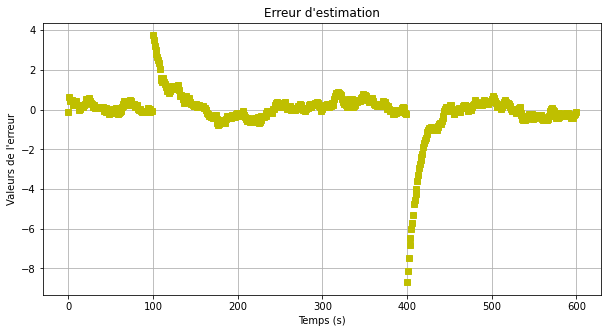

In [8]:
un1 = C1*np.ones(shape=len(z1))
un2 = C2*np.ones(shape=len(z2))
un3 = C3*np.ones(shape=len(z3))
un = np.concatenate((un1, un2, un3))

plt.figure(figsize=(10, 5))
plt.plot(t, z, 'o', color='skyblue', linestyle='', label = 'Les mesures')
plt.plot(t, xh, 'r+', label = 'L\'estimation')
plt.plot(t, un, 'b', label = 'La valeur de la constante')
plt.title('Estimation de la constante C')
plt.xlabel('Temps (s)')
plt.ylabel('Les valeurs l\'etimation')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t, un - xh, 'ys')
plt.title('Erreur d\'estimation')
plt.xlabel('Temps (s)')
plt.ylabel('Valeurs de l\'erreur')
plt.grid()
plt.show()

L'estimation, tracée en rouge ci-dessus, est assez proche de la valeur réelle de la constante (qui correspond à une 'concaténation' des trois constantes C1, C2, C3 sur leur intervalles. 

On peut remarquer que le filtre est incorrect aux frontières des changements de constantes. En effet, au voisinage des décrochements, notre modèle ne respecte plus l'hypothèse de linéarité de départ, ce qui explique les difficultés d'estimation du filtre.

In [9]:
x0_est, v0_est = C1, 2
x0 = norm.rvs(loc = x0_est, scale = np.sqrt(v0_est))

Q = [1e-5, 1e-2, 1, 10]
xh_Q = []
P_Q = []

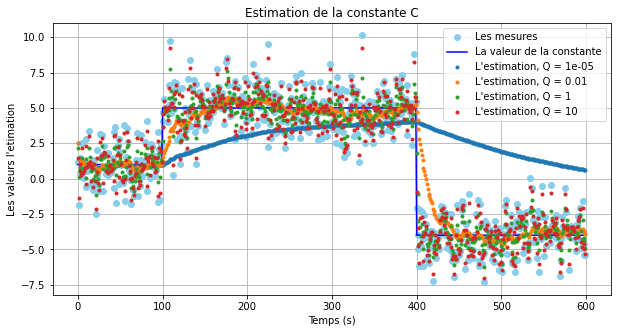

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(t, z, 'o', color='skyblue', linestyle='', label = 'Les mesures')
plt.plot(t, un, 'b', label = 'La valeur de la constante')
for q in Q :
    xh, P = Kalman_filter(q, R, z, x0)
    xh_Q.append(xh)
    P_Q.append(P)


    plt.plot(t, xh, '.', linestyle=' ', label = f'L\'estimation, Q = {q}')
plt.legend()
plt.title('Estimation de la constante C')
plt.xlabel('Temps (s)')
plt.ylabel('Les valeurs l\'etimation')
plt.legend()
plt.grid()
plt.show()

Lors de l'estimation de plusieurs constantes,on peut remarquer que plus la variance du bruit sur l'état augmente, plus l'estimation se rapproche des mesures. Avec un Q grand (exemple : 100) on a même une estimation de l'état qui est exactement les mesures.

De plus, si cette variance est trop faible, alors le gain de Kalman n'évolue pas assez entre l'état $k$ et l'état $k+1$ pour que les prédictions se rapprochent de la nouvelle valeur de la constante. En effet, ce gain ne dépend pas de l'erreur d'estimation, et son comportement est dépend juste de nombre d'itération, de la variance $P_{0}$ initiale et de la variance du bruit sur l'état.

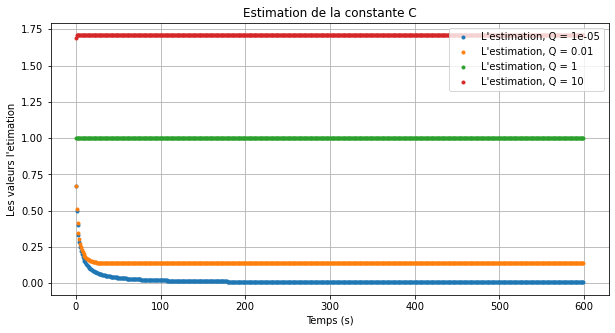

In [11]:
plt.figure(figsize=(10, 5))
for q in Q :
    xh, P = Kalman_filter(q, R, z, x0)
    xh_Q.append(xh)
    P_Q.append(P)


    plt.plot(t, P, '.', linestyle=' ', label = f'L\'estimation, Q = {q}')
plt.legend()
plt.title('Estimation de la constante C')
plt.xlabel('Temps (s)')
plt.ylabel('Les valeurs l\'etimation')
plt.legend()
plt.grid()
plt.show()

On peut remarquer que plus le bruit Q augmente, plus la covariance tend vers l'écart-type R des mesures fixé au départ (valeur de 2).  
A l'inverse quand Q est petit, on a une convergence empirique vers Q.

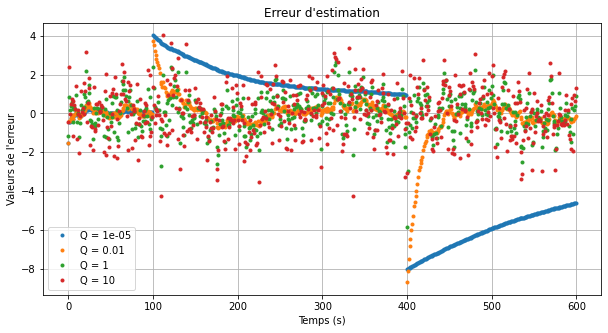

In [12]:
plt.figure(figsize=(10, 5))
for q in Q :
    xh, P = Kalman_filter(q, R, z, x0)
    xh_Q.append(xh)
    P_Q.append(P)

    plt.plot(t, un - xh, '.', linestyle=' ', label=f'Q = {q}')
plt.legend()
plt.title('Erreur d\'estimation')
plt.xlabel('Temps (s)')
plt.ylabel('Valeurs de l\'erreur')
plt.grid()
plt.show()

## Estimation d'un signal en échelon

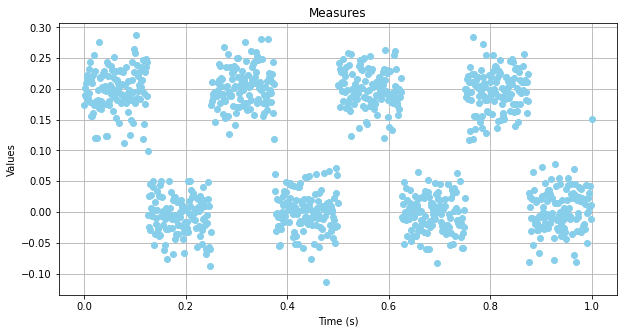

In [13]:
R = 0.001
N = 1000

c = 0.1

t = np.linspace(0, 1, N)
z = c*(signal.square(2 * np.pi * 4 * t) + 1)
noise = norm.rvs(loc = 0, scale = np.sqrt(R), size = N)

zNoise = z + noise

plt.figure(figsize=(10, 5))
plt.plot(t, zNoise, 'o', color = 'skyblue', linestyle = '')
plt.title('Measures')
plt.xlabel('Time (s)')
plt.ylabel('Values')
plt.grid()
plt.show()

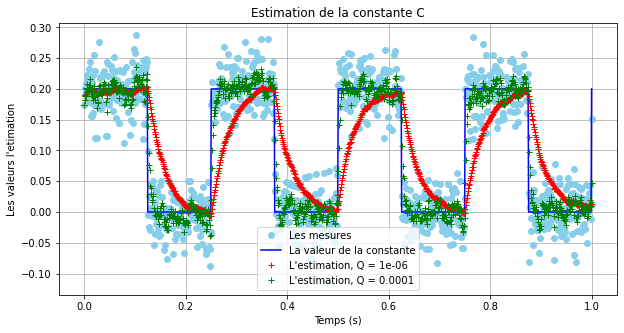

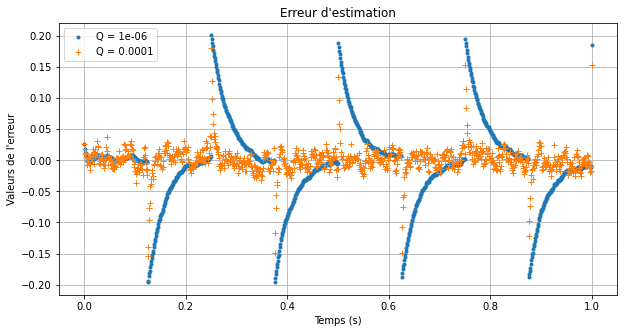

In [14]:
Q1, Q2 = 1e-6, 1e-4
x0_est, v0_est = 0.2, 5
x0 = norm.rvs(loc = x0_est, scale = np.sqrt(v0_est))

xh1, P = Kalman_filter(Q1, R, zNoise, x0)
xh2, P = Kalman_filter(Q2, R, zNoise, x0)

plt.figure(figsize=(10, 5))
plt.plot(t, zNoise, 'o', color='skyblue', linestyle='', label = 'Les mesures')
plt.plot(t, z, 'b', label = 'La valeur de la constante')
plt.plot(t, xh1, 'r+', label = f'L\'estimation, Q = {Q1}')
plt.plot(t, xh2, 'g+', label = f'L\'estimation, Q = {Q2}')
plt.title('Estimation de la constante C')
plt.xlabel('Temps (s)')
plt.ylabel('Les valeurs l\'etimation')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t, z - xh1, '.', label = f'Q = {Q1}')
plt.plot(t, z - xh2, '+', label = f'Q = {Q2}')
plt.title('Erreur d\'estimation')
plt.xlabel('Temps (s)')
plt.ylabel('Valeurs de l\'erreur')
plt.legend()
plt.grid()
plt.show()

De la même manière que ci-dessus, estimer un échelon revient à estimer plusieurs constantes, et on a les même conclusions.  
Si la variance du bruit sur les mesures est faible, alors l'évolution des prédiciton se fait lentement vers la valeur de l'échelon. Si cette variance est trop élevée, alors les prédictions sont trop proches des mesures bruitées.
Pour une variance bien choisie, alors l'état construit a la même évolution que l'échelon, cependant il y a une erreur résiduelle moyenne importante.


## Estimation d'un signal sinusoïdal

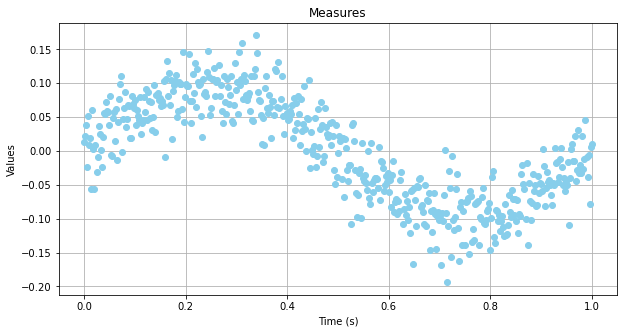

In [15]:
R = 0.001
N = 500

c = 0.1

t = np.linspace(0, 1, N)
z = c*np.sin(2 * np.pi * t)
noise = norm.rvs(loc = 0, scale = np.sqrt(R), size = N)

zNoise = z + noise

plt.figure(figsize=(10, 5))
plt.plot(t, zNoise, 'o', color = 'skyblue', linestyle = '')
plt.title('Measures')
plt.xlabel('Time (s)')
plt.ylabel('Values')
plt.grid()
plt.show()

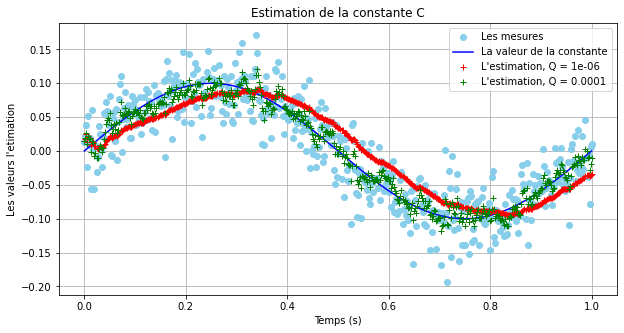

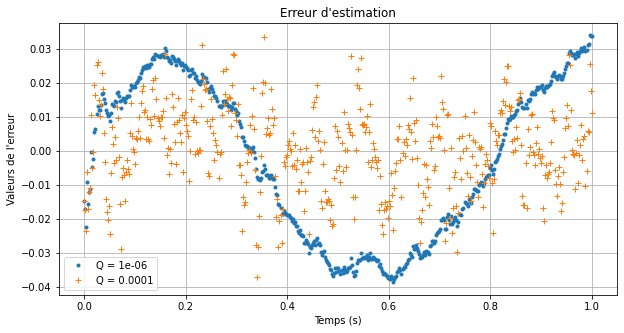

In [16]:
Q1, Q2= 1e-6, 1e-4
x0_est, v0_est = 0, 2
x0 = norm.rvs(loc = x0_est, scale = np.sqrt(v0_est))

xh1, P = Kalman_filter(Q1, R, zNoise, x0)
xh2, P = Kalman_filter(Q2, R, zNoise, x0)

plt.figure(figsize=(10, 5))
plt.plot(t, zNoise, 'o', color='skyblue', linestyle='', label = 'Les mesures')
plt.plot(t, z, 'b', label = 'La valeur de la constante')
plt.plot(t, xh1, 'r+', label = f'L\'estimation, Q = {Q1}')
plt.plot(t, xh2, 'g+', label = f'L\'estimation, Q = {Q2}')
plt.title('Estimation de la constante C')
plt.xlabel('Temps (s)')
plt.ylabel('Les valeurs l\'etimation')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t, z - xh1, '.', label = f'Q = {Q1}')
plt.plot(t, z - xh2, '+', label = f'Q = {Q2}')
plt.title('Erreur d\'estimation')
plt.xlabel('Temps (s)')
plt.ylabel('Valeurs de l\'erreur')
plt.legend()
plt.grid()
plt.show()

Go expliquer ça

## Filtre de Kalman étendu et filtre de Kalman sans parfum

Pour traiter des cas où le système est non linéaire mais où les hypothèses de gaussianité sont toujours satisfaites, on peut utiliser le filtre de Kalman étendu (EKF), ou le filte de Kalman sans parfum (UKF) Cependant on ne peut plus postuler que le solution obtenue est optimale. 

Contrairement à l'EFK qui linéarise le système à chaque tour de boucle de l'algorithme, ce qui est très couteux, l'UFK propose une méthode qui évite la linéarisation à chaque étape de calcul.

### Utilisation du filtre de Kalman étendu

Le principe du filtre de Kalman étendu (ou EKF) est de linéariser localement les équations. Pour cela nous avons besoin de calculer, à chaque nouvel échantillon traité, les matrices de dérivées partielles (jacobiennes). Ensuite, il faut appliquer les équations du filtre de Kalman classique en utilisant les jacobiennes calculées. 

La statbilité est cependant locale et non plus globale. La stabilité de l'ensemble de l'estimation est donc très sensible aux paramètres d'initialisation. 

Nous avons besoin de calculer la matrice Jacobienne des équations d'état puis la matrice Jacobienne de la fonction f.

In [17]:
def Kalman_filter_Extended(Q, R, z) : 
    '''
    Implémentation de la méthode du filtre de Kalman étendu
    
    Args: 
        Q : covariance du bruit sur l'état
        R : variance des mesures, ie bruit sur les mesures 
        z : mesures
    
    Returns: 
        xh : array contenant les estimations des états
    '''
    
    #Initialisation
    xh = np.zeros(shape = len(z))
    x0 = norm.rvs(loc = 0, scale = np.sqrt(2), size = 1)
    P = np.zeros(shape = len(z))
    P0 = 1
    xh[0] = x0
    P[0] = P0 + Q #Ajout de la covariance du bruit
    
    for p in range(0, len(z), 1):
        K = P[p] / (P[p] + R)
        xh[p] = xh[p] + K * (z[p] - xh[p])
        P[p] = P[p] - K * P[p]
        if p < len(z) - 1:
            xh[p + 1] = xh[p]
            P[p + 1] = P[p] + Q
    
    return xh, P